In [1]:
import argparse
from tensorflow import keras
from tensorflow.python.keras.models import model_from_json
import numpy as np 
import shap 

from tools.metadata_tools import *
shap.initjs()

In [2]:
ELEMENT_DIC = {
        'hispanic-muslim': ['horseshoe arch',   'lobed arch',   'flat arch'],
        'gothic':       ['pointed arch',   'ogee arch',   'trefoil arch'],
        'renaissance':  ['triangular pediment',   'segmental pediment',   'serliana'],
        'baroque':      ['rounded arch',   'lintelled doorway',    'porthole',   'broken pediment',   'solomonic column']
    }
TRUE_ELEMENT_DIC = {
        'hispanic-muslim': ['horseshoe arch',   'lobed arch',   'flat arch'],
        'gothic':       ['pointed arch',   'ogee arch',   'trefoil arch'],
        'renaissance':  ['triangular pediment',   'segmental pediment',   'serliana','rounded arch',   'lintelled doorway',    'porthole'],
        'baroque':      ['rounded arch',   'lintelled doorway',    'porthole',   'broken pediment',   'solomonic column']
    }
names = [el for sublist in list(ELEMENT_DIC.values()) for el in sublist]

In [3]:
modelfile = "models/trainingJSON_2020-06-16_12:32:03"
test = "../Results/json_detection/"
train = "../Results/json_detection/train"

In [4]:
json = open(modelfile+'.json', 'r')
model_json = json.read()
json.close()
loaded_model = model_from_json(model_json)
# load weights into loaded model
loaded_model.load_weights(modelfile+'.h5')
print('Model loaded')
loaded_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


FileNotFoundError: [Errno 2] No such file or directory: 'models/trainingJSON_2020-06-16_12:32:03.json'

In [5]:
matrix_metadata = metadata_to_matrix(train, "json")
train_data = matrix_metadata[:,:14].astype(np.float32)
from keras.utils import to_categorical
train_label = to_categorical(matrix_metadata[:,14].astype(np.float32).astype(np.int8))

Using TensorFlow backend.


In [6]:
matrix_metadata = metadata_to_matrix(test, "json")
test_data = matrix_metadata[:,:14].astype(np.float32)
test_label = to_categorical(matrix_metadata[:,14].astype(np.float32).astype(np.int8))

In [7]:
def f(X):
    return loaded_model.predict(X)
elements = np.random.choice(len(train_data), int(0.3*len(train_data)), False)

In [8]:
explainer = shap.KernelExplainer(f, train_data[elements])
shap_values = explainer.shap_values(test_data, nsamples=100)

Using 216 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████| 372/372 [03:37<00:00,  1.71it/s]


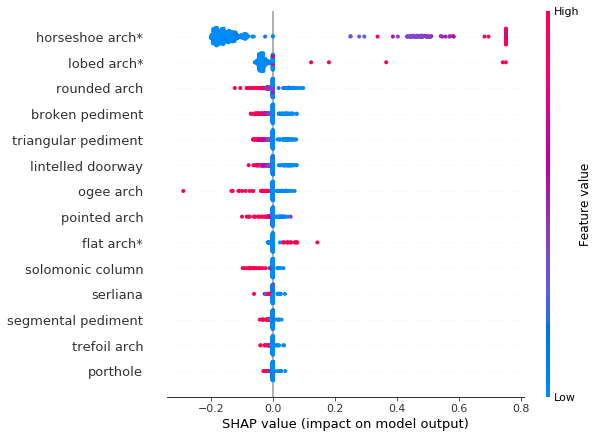

In [19]:
local_names = [el for sublist in list(ELEMENT_DIC.values()) for el in sublist]
for i in range(len(local_names)):
    if local_names[i] in TRUE_ELEMENT_DIC['hispanic-muslim']:
        local_names[i] = local_names[i] + '*'
shap.summary_plot(shap_values[0], test_data, feature_names=local_names)

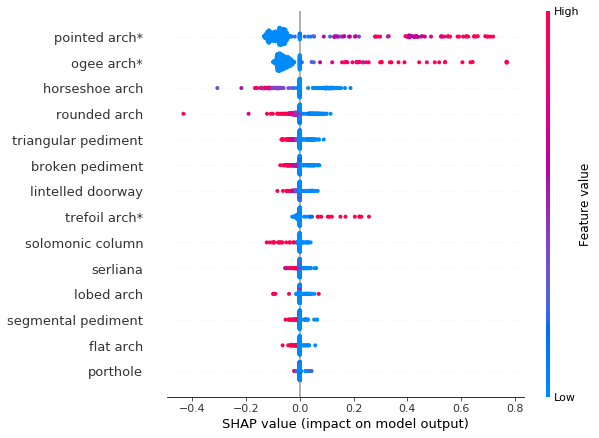

In [20]:
local_names = [el for sublist in list(ELEMENT_DIC.values()) for el in sublist]
for i in range(len(local_names)):
    if local_names[i] in TRUE_ELEMENT_DIC['gothic']:
        local_names[i] = local_names[i] + '*'
shap.summary_plot(shap_values[1], test_data, feature_names=local_names)

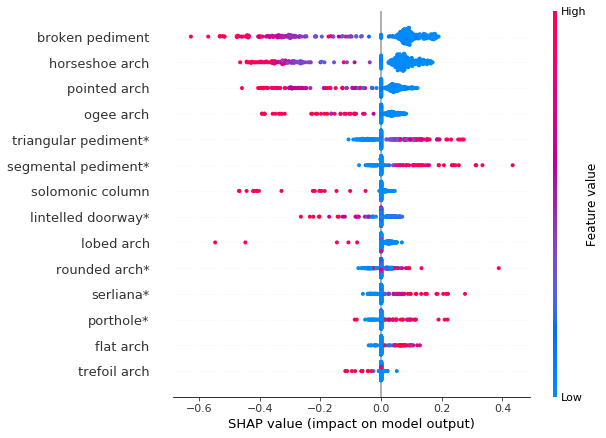

In [21]:
local_names = [el for sublist in list(ELEMENT_DIC.values()) for el in sublist]
for i in range(len(local_names)):
    if local_names[i] in TRUE_ELEMENT_DIC['renaissance']:
        local_names[i] = local_names[i] + '*'
shap.summary_plot(shap_values[2], test_data, feature_names=local_names)

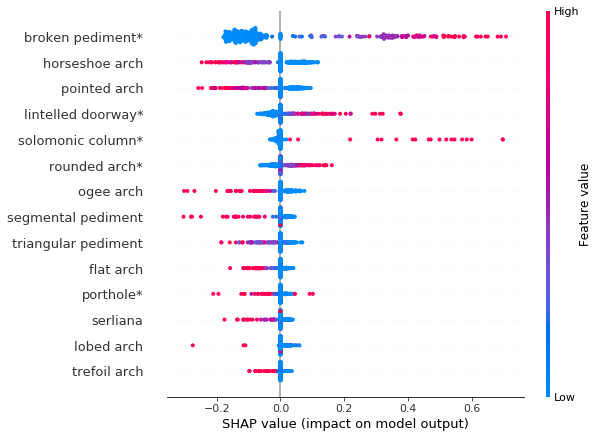

In [22]:
local_names = [el for sublist in list(ELEMENT_DIC.values()) for el in sublist]
for i in range(len(local_names)):
    if local_names[i] in TRUE_ELEMENT_DIC['baroque']:
        local_names[i] = local_names[i] + '*'
shap.summary_plot(shap_values[3], test_data, feature_names=local_names)

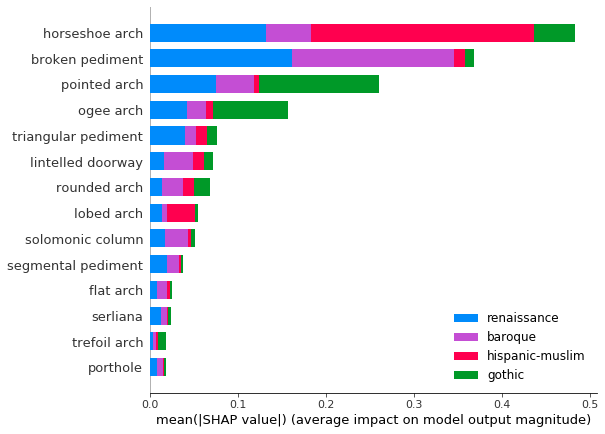

In [18]:
shap.summary_plot(shap_values, test_data, feature_names=names, class_names=list(ELEMENT_DIC.keys()))